# Isotopes Fractionation
## Answer Key
### Kevin Rozmiarek

# Questions

1. Let me add that the approximate temperature dependence of the fractionation factor for water evaporation in reality follows this expression $\alpha = 0.9822e^{(7.9448 /T)}$ Show the curve for $\delta$ value of the liquid as a function of remaining unevaporated liquid. The starting isotope value of the water is $\delta = -20$‰ and the water is held at 35°C. Why do you think these numbers are so high?

Answer: 

    remaining_Water_Fraction  remaining_Delta
0                   0.100000      -426.228170
1                   0.109091      -414.503146
2                   0.118182      -403.505699
3                   0.127273      -393.139579
4                   0.136364      -383.327091
..                       ...              ...
95                  0.963636       -28.403142
96                  0.972727       -26.279838
97                  0.981818       -24.171710
98                  0.990909       -22.078511
99                  1.000000       -20.000000

[100 rows x 2 columns]


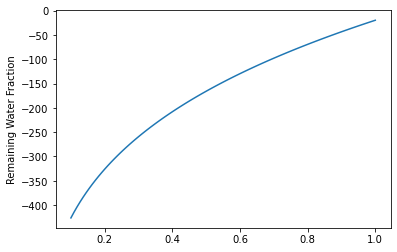

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

starting_delta_values = np.linspace(-10., 30., 5)
alpha = 0.9822*math.exp(7.9448/35) #Add the dependency on temperature for alpha

def remaining_Delta(starting_delta_values, remaining_Water_Fraction, alpha): #Function which calculates the isotope value for the remaining water post-process
    remaining_Delta = (starting_delta_values + 1000.) * (remaining_Water_Fraction ** (alpha - 1.)) - 1000. #Application of equation 2
    return(remaining_Delta)

remaining_Water_Fraction = np.linspace(0.1, 1., 100) 

calculated_Data = pd.DataFrame(np.array(remaining_Water_Fraction), columns=['remaining_Water_Fraction'])

append_Array = remaining_Delta(-20, remaining_Water_Fraction, alpha)
calculated_Data['remaining_Delta'] = append_Array 

print(calculated_Data)

remaining_Water_Fraction_Plot = calculated_Data['remaining_Water_Fraction']
remaining_Delta_Plot = calculated_Data['remaining_Delta']
plt.plot(remaining_Water_Fraction_Plot,remaining_Delta_Plot)
plt.ylabel('Starting delta value for 18O of -20 permil at 35 deg C')
plt.ylabel('Remaining Water Fraction')
plt.show()

Example answer: The number is high because reality includes condensation and an experiment that tests for fractionation factor would observe that. Because the process we have approximated to be unidirectional, we consider it a kinetic isotope fractionation.

2. Speculate on how you would determine the isotope value for two independent fractionations happening at once.

Answer: You could add the factors linearly such as:

$$
\delta_{l} = (\delta_{l,0} + 1000)(f^{\alpha_{1}-1} + f^{\alpha_{2}-1}) - 1000
$$

3. Below is a new vector of some measured starting $\delta$ data. Modify the if statement in the for loop to be able to handle this tibble and show the resulting dataset. Hint: Think about how we might use the np.isnan(x) catch.

Answer:

In [25]:
import numpy as np
import pandas as pd

measured_Data = np.array([-10., np.nan, 20., 30.])

measured_Data_Fixed = measured_Data[~np.isnan(measured_Data)] # Adding the fix for bad data. Not doing the warning because this line will just catch everything

alpha = 0.990

def remaining_Delta(measured_Data_Fixed, remaining_Water_Fraction, alpha):
    remaining_Delta = (measured_Data_Fixed + 1000.) * (remaining_Water_Fraction ** (alpha - 1.)) - 1000. #Application of equation 2
    return(remaining_Delta)

remaining_Water_Fraction = np.linspace(0.1, 1., 100)

calculated_Data = pd.DataFrame(np.array(remaining_Water_Fraction), columns=['remaining_Water_Fraction'])

for i in measured_Data_Fixed:
    append_Array = remaining_Delta(i, remaining_Water_Fraction, alpha)
    calculated_Data[str(i)] = append_Array 

print(calculated_Data)

    remaining_Water_Fraction      -10.0       20.0       30.0
0                   0.100000  13.060062  43.758852  53.991782
1                   0.109091  12.178968  42.851058  53.075088
2                   0.118182  11.369117  42.016666  52.232516
3                   0.127273  10.619889  41.244735  51.453016
4                   0.136364   9.922874  40.526598  50.727839
..                       ...        ...        ...        ...
95                  0.963636  -9.633223  20.377891  30.381596
96                  0.972727  -9.726212  20.282085  30.284850
97                  0.981818  -9.818327  20.187178  30.189013
98                  0.990909  -9.909584  20.093156  30.094069
99                  1.000000 -10.000000  20.000000  30.000000

[100 rows x 4 columns]
